<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None
   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2   

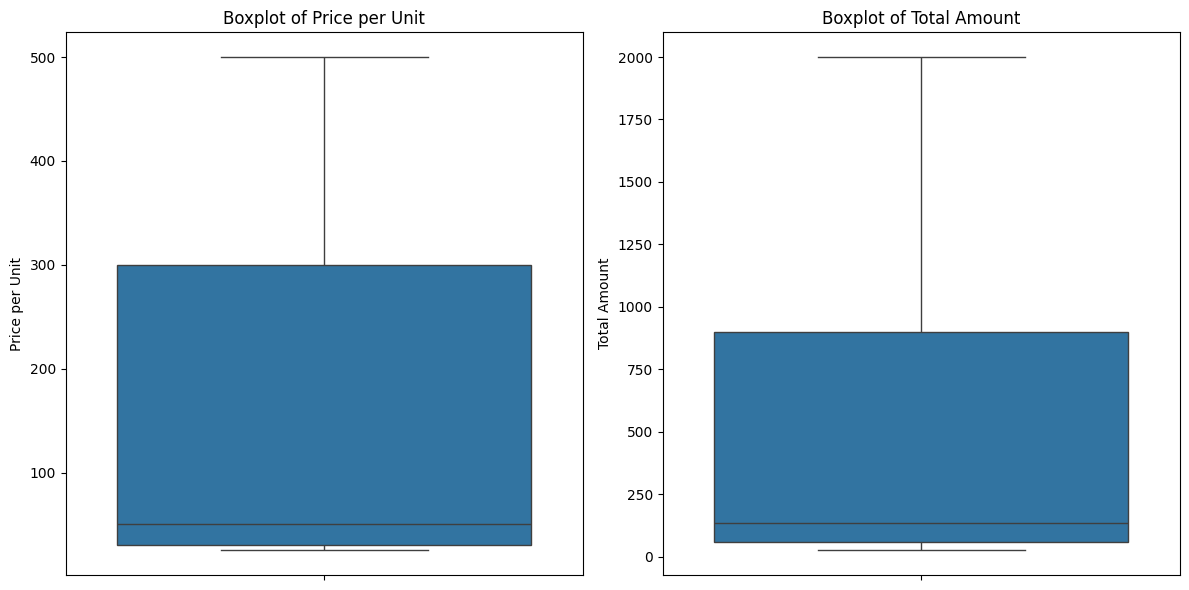

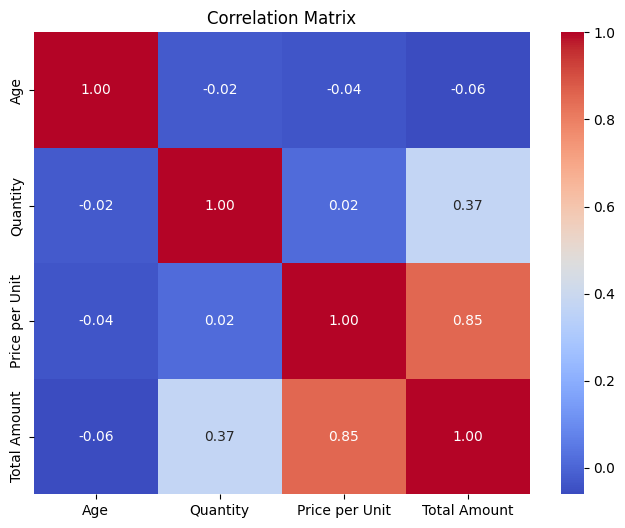

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


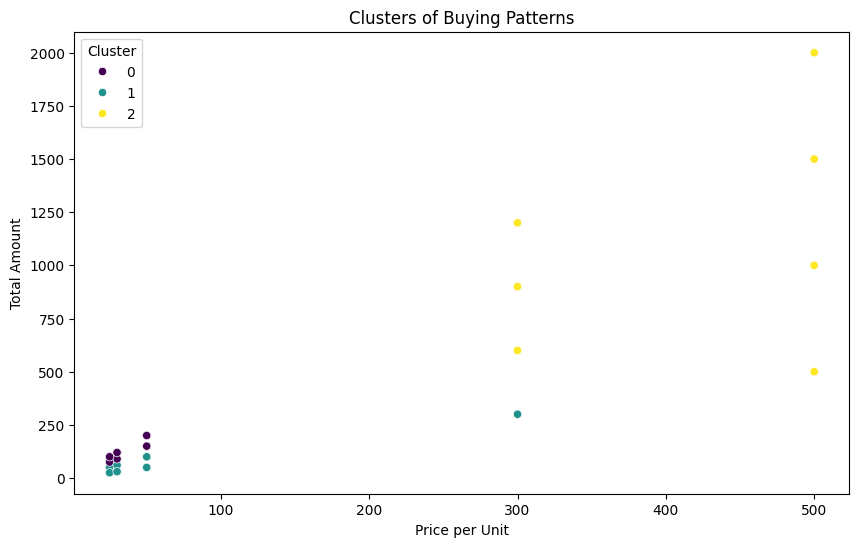

                  count        mean         std   min   25%   50%    75%  \
Product Category                                                           
Beauty            307.0  184.055375  194.929399  25.0  30.0  50.0  300.0   
Clothing          351.0  174.287749  186.017065  25.0  30.0  50.0  300.0   
Electronics       342.0  181.900585  189.049673  25.0  30.0  50.0  300.0   

                    max  
Product Category         
Beauty            500.0  
Clothing          500.0  
Electronics       500.0  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Load the dataset
file_path = '/content/retail_sales_dataset.csv'
df = pd.read_csv(file_path)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display basic information about the dataset
print(df.info())
print(df.head())
print(df.describe(include='all'))

# Exploratory Data Analysis (EDA)

# 1. Checking for outliers in 'Price per Unit' and 'Total Amount' using boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=df['Price per Unit'], ax=axes[0])
axes[0].set_title('Boxplot of Price per Unit')

sns.boxplot(y=df['Total Amount'], ax=axes[1])
axes[1].set_title('Boxplot of Total Amount')

plt.tight_layout()
plt.show()

# 2. Correlation Analysis
correlation_matrix = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Outlier Treatment (optional based on specific criteria)
# df = df[(np.abs(stats.zscore(df[['Price per Unit', 'Total Amount']])) < 3).all(axis=1)]

# Assessing Marketing Campaigns (This requires specific campaign data)

# Evaluating Buying Patterns

# Standardize the numerical features for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Quantity', 'Price per Unit', 'Total Amount']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price per Unit', y='Total Amount', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Buying Patterns')
plt.show()

# Deciphering Pricing Strategies

# Group by Product Category and analyze price distribution
price_summary = df.groupby('Product Category')['Price per Unit'].describe()
print(price_summary)

# Improving Supply Chain Procedures
# Further analysis is needed on supply chain specific data

# Save the processed data to a new CSV file
#df.to_csv('/mnt/data/retail_sales_processed.csv', index=False)
